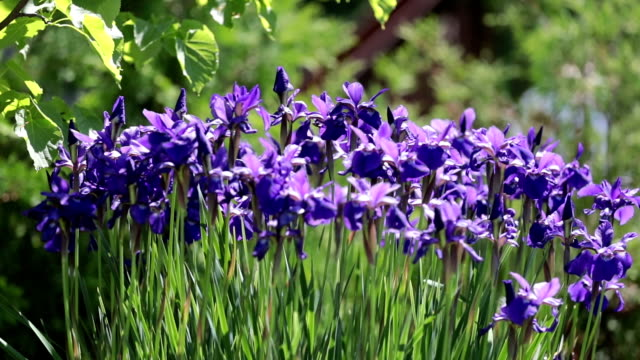

# Predicting the types of Flower based on the attributes of the Flowers


**Iris Data Analysis and Model Development***

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species

In this analysis we are going to use Logistic Regression, SVM and Decision Tree classification.

This is probably the most versatile, easy and resourceful dataset in pattern recognition literature. Nothing could be simpler than the Iris dataset to learn classification techniques. If you are totally new to data science, this is your start line. The data has only 150 rows & 4 columns.

**Problem: Predict the class of the flower based on available attributes.**

<h3><b>Attribute Information:</b></h3>
<br> 1. sepal length in cm
<br> 2. sepal width in cm
<br> 3. petal length in cm
<br> 4. petal width in cm
<br> 5. class:
       <br> -- Iris Setosa
       <br> -- Iris Versicolour
       <br> -- Iris Virginica

In [1]:
# Import the python packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import multiclass
from sklearn import tree
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset and made id of the dataset as index column .
df=pd.read_csv('Iris.csv',index_col='Id')
# Check for firsy 5 data rows
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Data preprocessing
In this portion we are planing to analyze if there any data cleaning should be preformed in the dataset to make sure that the dataset can be used for Data analysis and Model creation activites with out any problems on the data frame.

In [3]:
# Identifying the shape of the data frame.
sh = df.shape
print('No  Rows and Colums of Iris dataset:',sh)

No  Rows and Colums of Iris dataset: (150, 5)


In [4]:
# Checking for the null value available in the dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

The Iris dataset shows that there is no null values available in the dataset which can be considered as a plus in this dataset.

## Exploratory Data analysis

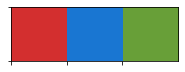

In [6]:
# Save a palette to a variable:
Colors=['#D32F2F','#1976D2','#689F38']
# Use palplot and pass in the variable:
sns.palplot(sns.color_palette(Colors))

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

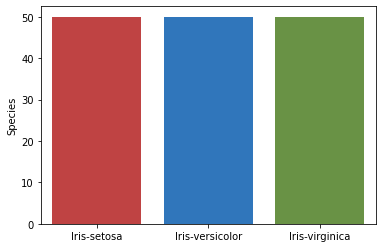

In [9]:
# To check how many are in the barplot in each class
sns.barplot(df['Species'].unique(),df['Species'].value_counts(),data=df, palette=Colors)

### Developing Scatter plot as per attributes

Here the Scatter plots will be develop the position flowers as per each flower attributes.

In [10]:
# Function was developed 
def Scatterplot(X,Y,Title):
    ax=sns.scatterplot(x=X, y=Y, hue="Species", data=df, palette=Colors, marker="X")
    plt.title(Title)
    plt.show()
    figure = ax.get_figure()
    figure.savefig(Title, dpi=100)
    plt.close()

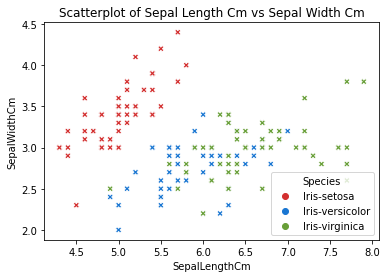

In [11]:
# SepalLengthCm vs SepalWidthCm
X=df['SepalLengthCm']
Y=df['SepalWidthCm']
Title='Scatterplot of Sepal Length Cm vs Sepal Width Cm'

fig=Scatterplot(X,Y,Title)

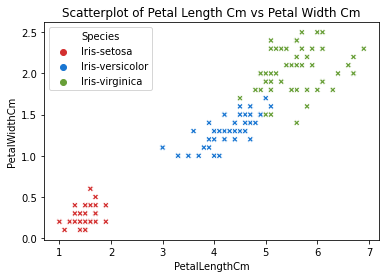

In [12]:
# PetalLengthCm vs PetalWidthCm
X=df['PetalLengthCm']
Y=df['PetalWidthCm']
Title='Scatterplot of Petal Length Cm vs Petal Width Cm'

fig=Scatterplot(X,Y,Title)

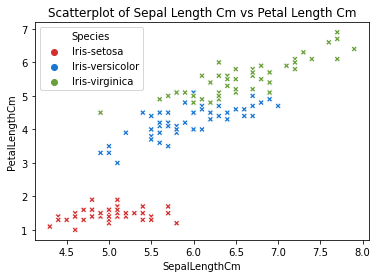

In [13]:
# SepalLengthCm vs PetalLengthCm
X=df['SepalLengthCm']
Y=df['PetalLengthCm']
Title='Scatterplot of Sepal Length Cm vs Petal Length Cm'

fig=Scatterplot(X,Y,Title)

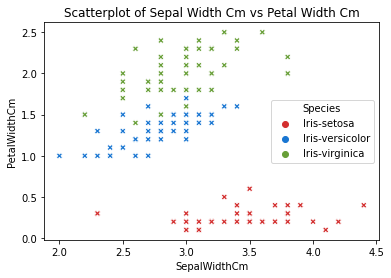

In [14]:
# SepalLengthCm vs PetalLengthCm
X=df['SepalWidthCm']
Y=df['PetalWidthCm']
Title='Scatterplot of Sepal Width Cm vs Petal Width Cm'

fig=Scatterplot(X,Y,Title)

### Box plot for each variables

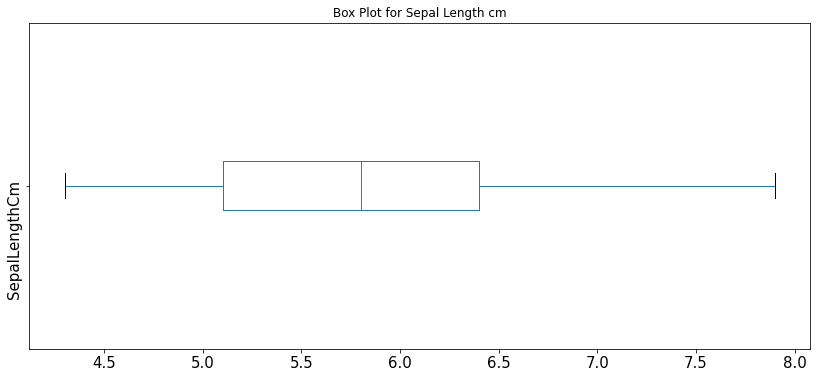

In [15]:
# Box plot for Sepal Length cm
ax= df['SepalLengthCm'].plot(kind='box', vert=False, rot=90, fontsize=15, figsize=(14,6))
plt.title('Box Plot for Sepal Length cm')
figure = ax.get_figure()
figure.savefig('Box Plot for Sepal Length cm', dpi=100)

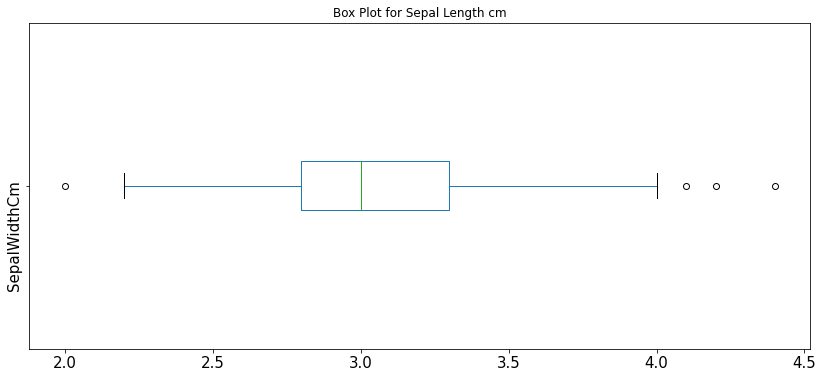

In [16]:
# Box plot for Sepal Width cm
ax= df['SepalWidthCm'].plot(kind='box', vert=False, rot=90, fontsize=15, figsize=(14,6))
plt.title('Box Plot for Sepal Length cm')
figure = ax.get_figure()
figure.savefig('Box plot for Sepal Width cm', dpi=100)

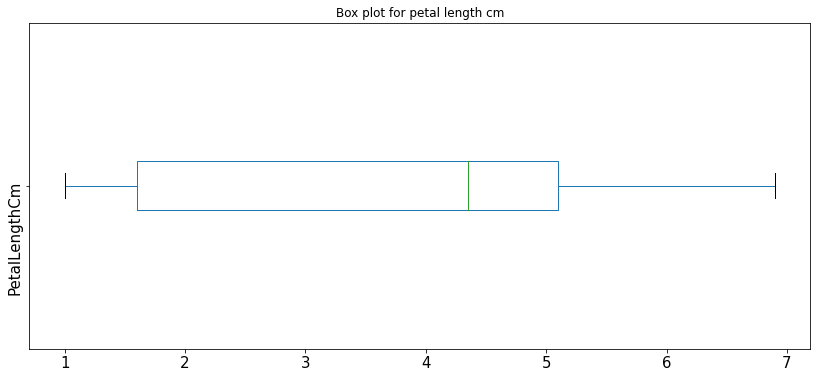

In [17]:
# Box plot for petal length cm
ax= df['PetalLengthCm'].plot(kind='box', vert=False, rot=90, fontsize=15, figsize=(14,6))
plt.title('Box plot for petal length cm')
figure = ax.get_figure()
figure.savefig('Box plot for petal length cm', dpi=100)

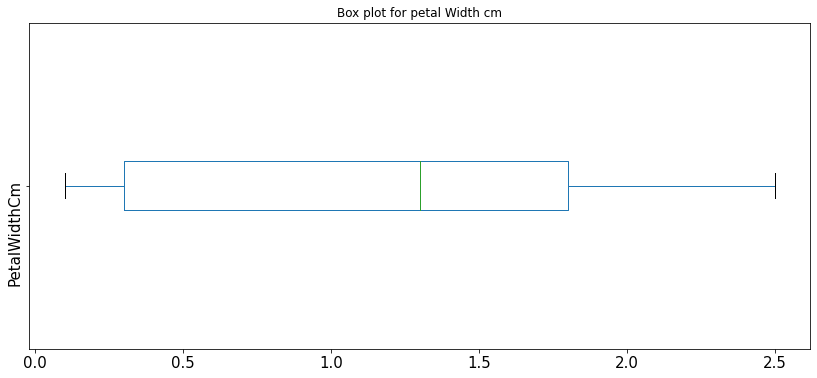

In [18]:
# Box plot for petal Width cm
ax= df['PetalWidthCm'].plot(kind='box', vert=False, rot=90, fontsize=15, figsize=(14,6))
plt.title('Box plot for petal Width cm')
figure = ax.get_figure()
figure.savefig('Box plot for petal Width cm', dpi=100)

### Create Distibution plot

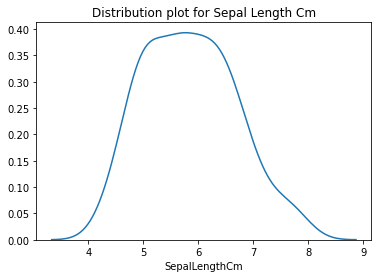

In [19]:
# create a dist.plot for dataset for Sepal Length Cm
ax=sns.distplot(df['SepalLengthCm'], bins=0.2,hist=False)
plt.title('Distribution plot for Sepal Length Cm')
figure = ax.get_figure()
figure.savefig('Distribution plot for Sepal Length Cm', dpi=100)

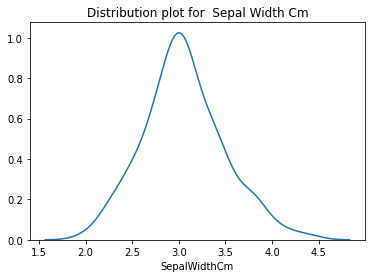

In [20]:
# create a dist.plot for dataset for Sepal Width Cm 
sns.distplot(df['SepalWidthCm'], bins=0.2,hist=False)
plt.title('Distribution plot for  Sepal Width Cm')
figure = ax.get_figure()
figure.savefig('Distribution plot for  Sepal Width Cm', dpi=100)

both Sepal Length Cm and Sepal Width Cm  have normal Guassian bell curve distribution

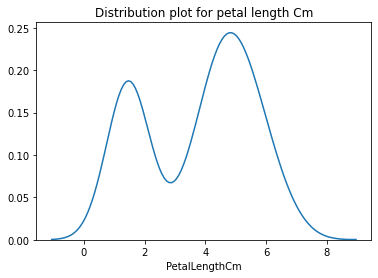

In [21]:
# create a dist.plot for dataset for petal length Cm 
sns.distplot(df['PetalLengthCm'], bins=0.2,hist=False)
plt.title('Distribution plot for petal length Cm')
figure = ax.get_figure()
figure.savefig('Distribution plot for petal length Cm', dpi=100)

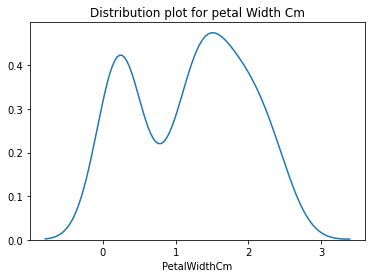

In [22]:
# create a dist.plot for dataset for petal Width Cm 
sns.distplot(df['PetalWidthCm'], bins=0.2,hist=False)
plt.title('Distribution plot for petal Width Cm')
figure = ax.get_figure()
figure.savefig('Distribution plot for petal Width Cm', dpi=100)

both petal Length Cm and petal Width Cm have bimodel distribution

### Developing density plots

create a density chart for unit cost
 .axvline(df[]) is used to set a line in between where statistics can be and line can be given with color
 .mean(), .median()

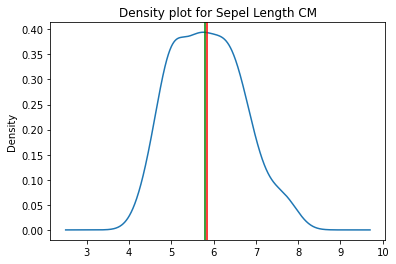

In [23]:
# Density plot for Sepel Length
Axis=df['SepalLengthCm'].plot(kind='density')
Axis.axvline(df['SepalLengthCm'].median(), color='green')
Axis.axvline(df['SepalLengthCm'].mean(), color='red')
plot=plt.title('Density plot for Sepel Length CM')
figure = ax.get_figure()
figure.savefig('Density plot for Sepel Length CM', dpi=100)

There is a slight devivation can be seen between median and mean

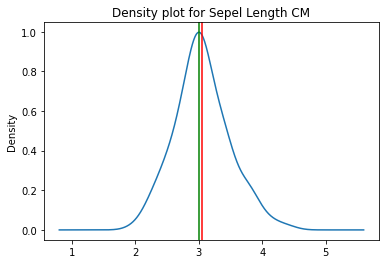

In [24]:
# Density plot for Sepel width
Axis=df['SepalWidthCm'].plot(kind='density')
Axis.axvline(df['SepalWidthCm'].median(), color='green')
Axis.axvline(df['SepalWidthCm'].mean(), color='red')
plt.title('Density plot for Sepel Length CM')
figure = ax.get_figure()
figure.savefig('Density plot for Sepel Length CM', dpi=100)

Median acts as a center point in the density plot

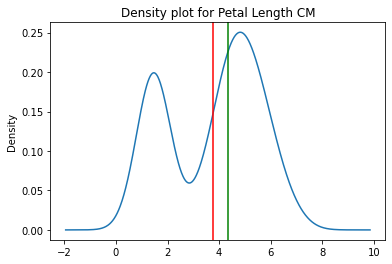

In [25]:
# Density plot for petal legnth
Axis=df['PetalLengthCm'].plot(kind='density')
Axis.axvline(df['PetalLengthCm'].median(), color='green')
Axis.axvline(df['PetalLengthCm'].mean(), color='red')
plt.title('Density plot for Petal Length CM')
figure = ax.get_figure()
figure.savefig('Density plot for Petal Length CM', dpi=100)

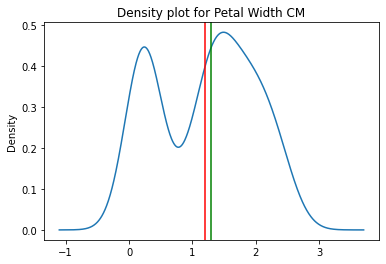

In [26]:
# Density plot for petal width
Axis=df['PetalWidthCm'].plot(kind='density')
Axis.axvline(df['PetalWidthCm'].median(), color='green')
Axis.axvline(df['PetalWidthCm'].mean(), color='red')
plt.title('Density plot for Petal Width CM')
figure = ax.get_figure()
figure.savefig('Density plot for Petal Width CM', dpi=100)

## Model Development and deployment

In [27]:
# Label encoder for the target variable
encode = LabelEncoder()
df.Species = encode.fit_transform(df.Species)
classes = encode.classes_
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [28]:
# Spilt the dataset based on train and test split

train, test= train_test_split(df, test_size=0.2,random_state=0)

print('No of Rows and Columns in Train:',train.shape)
print('No of Rows and Columns in Test:',test.shape)

No of Rows and Columns in Train: (120, 5)
No of Rows and Columns in Test: (30, 5)


In [29]:
# Describing the Train dataset 
train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.880833,3.053333,3.815833,1.230833,1.041667
std,0.850437,0.431907,1.784904,0.776525,0.834103
min,4.300000,2.000000,1.100000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.500000,3.300000,5.200000,1.900000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [30]:
# Train test dataset spliting dependent variable and independent variables
# Train split
Train_x=train.drop(columns=['Species'],axis=1)
Train_y=train['Species']

# Test split
Test_x=test.drop(columns=['Species'],axis=1)
Test_y=test['Species']

### Logistic Regression Model

In [31]:
# Developing a Logistic Regression model
model=LogisticRegression()

model.fit(Train_x,Train_y)
# Predict the output for test data 
Predict=model.predict(Test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [32]:
Predicted_Values_Model=model.predict(Test_x)

model_metrics = {
    "Train Accuracy" : model.score(Train_x,Train_y),
    "Test Accuracy"  : metrics.accuracy_score(Test_y,Predicted_Values_Model),
}

print(model_metrics)

{'Train Accuracy': 0.9333333333333333, 'Test Accuracy': 0.9666666666666667}


In [33]:
print('Predicted Values on test data:',encode.inverse_transform(Predict))

Predicted Values on test data: ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [34]:
print('\n\nAccuracy Score on test data : \n\n',accuracy_score(Test_y,Predict))



Accuracy Score on test data : 

 0.9666666666666667


### SVM classification

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.

In [35]:
# The Pipeline includes Standard scaler, One vs rest classifier
SVM=pipeline.make_pipeline(preprocessing.StandardScaler(),multiclass.OneVsRestClassifier(SVC(C=2,gamma=0.1)))

SVM.fit(Train_x,Train_y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=SVC(C=2, cache_size=200,
                                                   class_weight=None, coef0=0.0,
                                                   decision_function_shape='ovr',
                                                   degree=3, gamma=0.1,
                                                   kernel='rbf', max_iter=-1,
                                                   probability=False,
                                                   random_state=None,
                                                   shrinking=True, tol=0.001,
                                                   verbose=False),
                                     n_jobs=None))],
         verbose=False)

In [36]:
Predicted_Values=SVM.predict(Test_x)

SVM_metrics = {
    "Train Accuracy" : SVM.score(Train_x,Train_y),
    "Test Accuracy"  : metrics.accuracy_score(Test_y,Predicted_Values),
}

print(SVM_metrics)

{'Train Accuracy': 0.9583333333333334, 'Test Accuracy': 1.0}


In [37]:
### Buliding the Decision Tree
dt=pipeline.make_pipeline(preprocessing.StandardScaler(),tree.DecisionTreeClassifier(max_depth=2))
dt.fit(Train_x,Train_y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=2, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

In [38]:
Predicted_Values_dt=dt.predict(Test_x)

dt_metrics= {
    "Train Accuracy" : dt.score(Train_x,Train_y),
    "Test Accuracy"  : metrics.accuracy_score(Test_y,Predicted_Values_dt),
}

print(dt_metrics)

{'Train Accuracy': 0.9583333333333334, 'Test Accuracy': 0.9666666666666667}


[Text(133.92000000000002, 181.2, 'X[3] <= -0.557\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 0.671\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]')]

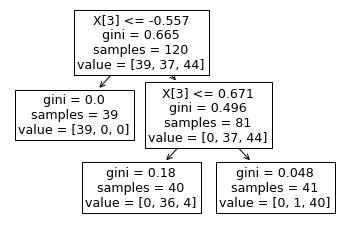

In [39]:
# Plot the Decision Tree
tree.plot_tree(dt['decisiontreeclassifier'])

As per the Test Accuracy we can see that SVM classification is considered as better solution since the test accuracy is 100% of therefore SVM classification is a better model for the dataframe